# 1. Introduction
Large-scale layoffs have become an increasingly prominent feature of the global labor market, particularly during periods of economic uncertainty, technological disruption, and financial tightening. This project applies time-series analysis to layoff event data to understand how workforce reductions evolve over time, distinguish between cyclical and shock-driven layoffs, and detect early warning signals that may precede large layoff waves.

Rather than focusing on descriptive exploration, the project emphasizes temporal structure, statistical signals, and forecasting-oriented insights that can support proactive decision-making by firms, policymakers, and labor market analysts.

# 2. Business Understanding
## 2.1 Problem Statement
Layoffs often appear sudden, but in many cases they are preceded by identifiable temporal patterns such as gradual increases, seasonal cycles, or volatility spikes. Organizations and policymakers frequently react after large-scale layoffs occur, due to limited analytical frameworks for detecting early warning signals in workforce data.

## 2.2 Why this is important
- Mass layoffs negatively affect economic stability, household income, and mental health.
- Governments require early indicators to design timely labor market interventions.
- Firms benefit from understanding macro and industry-level layoff cycles to inform workforce planning.
- Investors and analysts use workforce reductions as signals of financial stress.

Early detection of abnormal layoff behavior enables preventive rather than reactive responses.


## 2.3 Key Stakeholders
- Government labor and economic planning agencies
- Corporate workforce planning and HR strategy teams
- Investors and financial analysts
- Policy think tanks and development institutions
- Employees and labor unions
- Economic researchers and data scientists

## 2.4 Main Objective

To analyze layoff activity over time and identify cyclical patterns, shock-driven events, and early warning signals associated with large-scale workforce reductions.

## 2.5 Specific Objectives
1. Construct time-series representations of layoff activity at different temporal resolutions.
2. Identify long-term trends and seasonal or cyclical components in layoffs.
3. Detect abrupt structural breaks and shock-driven layoff events.
4. Quantify volatility changes that precede major layoff spikes.
5. Develop interpretable indicators that can serve as early warning signals.

## 2.6 Success Criteria
- The project will be considered successful if it:
- Clearly separates normal cyclical behavior from abnormal shock-driven layoffs.
- Identifies statistically defensible structural changes in layoff patterns.
- Produces interpretable signals rather than black-box forecasts.
- Demonstrates how early warnings could be detected before major layoff waves.
- Supports actionable recommendations for monitoring workforce risk.

# 3. Data Understanding
## 3.1 Data Source
The analysis uses a global layoffs dataset containing company-level layoff events across industries, geographies, and time periods. Each record corresponds to a reported layoff event with associated firm and contextual attributes.

## 3.2 Unit of Analysis
Each row represents a single layoff event by a company on a specific date. 
The dataset has 1417 records and 16 columns.

## 3.3 Key Variable Groups
**Layoff intensity variables**
Number of employees laid off,
Percentage of workforce affected   

**Temporal variables**
Layoff date,
Year,
Company att,ributes,
Industry
Company stage,
Company size before and after layoffs 

**Geographic variables**
Country,
Continent,
Headquarters location     

**Financial context**
Total funding raised

## 3.4 Time-Series Construction
Time-series are derived by aggregating layoff activity over time, for example:
- Total employees laid off per month
- Number of layoff events per month
- Average layoff percentage per period
- Industry-specific layoff indices
These derived series form the basis of all subsequent analysis.

## 3.5 Data Assumptions and Limitations
Layoff reporting may be incomplete or delayed.
Dates reflect reported layoff announcements, not necessarily execution dates.
Company funding values are coarse and may require normalization.

The dataset captures discrete events, not continuous workforce changes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('tech_layoffs.xlsx')
df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   #                            1418 non-null   int64         
 1   Company                      1418 non-null   object        
 2   Location_HQ                  1418 non-null   object        
 3   Country                      1418 non-null   object        
 4   Continent                    1418 non-null   object        
 5   Laid_Off                     1418 non-null   int64         
 6   Date_layoffs                 1418 non-null   datetime64[ns]
 7   Percentage                   1418 non-null   float64       
 8   Company_Size_before_Layoffs  1418 non-null   int64         
 9   Company_Size_after_layoffs   1418 non-null   int64         
 10  Industry                     1418 non-null   object        
 11  Stage                        1418 non-null 

In [4]:
df.duplicated().sum()

0

No duplicate records in this dataset

In [5]:
df.isna().sum()

#                              0
Company                        0
Location_HQ                    0
Country                        0
Continent                      0
Laid_Off                       0
Date_layoffs                   0
Percentage                     0
Company_Size_before_Layoffs    0
Company_Size_after_layoffs     0
Industry                       0
Stage                          0
Money_Raised_in_$_mil          0
Year                           0
lat                            0
lng                            0
dtype: int64

dataset has no missing values

In [28]:
# Columns preview
df.columns

Index(['#', 'Company', 'Location_HQ', 'Country', 'Continent', 'Laid_Off',
       'Date_layoffs', 'Percentage', 'Company_Size_before_Layoffs',
       'Company_Size_after_layoffs', 'Industry', 'Stage',
       'Money_Raised_in_$_mil', 'Year', 'lat', 'lng', 'Month'],
      dtype='object')

## Feature Engineering (Time-Series)
All time-series are derived from the Date_layoffs column, which represents the reported timing of each layoff event. The dataset records discrete layoff events, so aggregation is required to convert event-level data into continuous time-series suitable for temporal analysis.

The primary temporal resolution used is monthly, as it balances noise reduction with responsiveness to shocks. Yearly aggregation is retained for long-term trend validation.


In [7]:
# Total Employees Laid off per Month
df['Date_layoffs'] = pd.to_datetime(df['Date_layoffs'])
df['Month'] = df['Date_layoffs'].dt.to_period('M')

In [8]:
# Number of Layoff Events per Month
monthly_total_layoffs = (df.groupby('Month')['Laid_Off'].sum().to_timestamp().rename('total_laid_off'))
monthly_total_layoffs.head()

Month
2020-03-01     7441
2020-04-01    21864
2020-05-01    21404
2020-06-01     6442
2020-07-01     2198
Name: total_laid_off, dtype: int64

In [9]:
# Average Layoff Percentage per Period
monthly_layoff_events = (df.groupby('Month').size().to_timestamp().rename('layoff_events'))
monthly_layoff_events.head()

Month
2020-03-01     61
2020-04-01    151
2020-05-01     65
2020-06-01     29
2020-07-01     10
Name: layoff_events, dtype: int64

In [10]:
# Average Layoff Percentage per Month
monthly_avg_percentage = (df.groupby('Month')['Percentage'].mean().to_timestamp().rename('avg_layoff_percentage'))
monthly_avg_percentage.head()

Month
2020-03-01    37.207650
2020-04-01    22.365835
2020-05-01    26.246154
2020-06-01    22.758621
2020-07-01    30.000000
Name: avg_layoff_percentage, dtype: float64

In [11]:
# Combine Core Time-Series into One Frame
monthly_ts = pd.concat([monthly_total_layoffs,monthly_layoff_events,monthly_avg_percentage], axis=1)
monthly_ts.head()

,total_laid_off,layoff_events,avg_layoff_percentage
Month,,,
2020-03-01,7441,61,37.207650
2020-04-01,21864,151,22.365835
2020-05-01,21404,65,26.246154
2020-06-01,6442,29,22.758621
2020-07-01,2198,10,30.000000


In [12]:
# Industry-Specific Layoff Indices
# Total Layoffs per Industry per Month
industry_monthly_layoffs = (df.groupby(['Industry','Month'])['Laid_Off'].sum().reset_index())
industry_monthly_layoffs.head()

,Industry,Month,Laid_Off
0,AI,2023-10,20
1,AI,2023-11,150
2,Aerospace,2020-03,451
3,Aerospace,2020-04,40
4,Aerospace,2022-09,100


In [13]:
# Pivot to Industry Time-Series Matrix
industry_ts = (industry_monthly_layoffs.pivot(index='Month',columns='Industry',values='Laid_Off').fillna(0).to_timestamp())

industry_ts.head()

Industry,AI,Aerospace,Construction,Consumer,Crypto,Data,Education,Energy,Finance,Fitness,...,Other,Product,Real Estate,Recruiting,Retail,Sales,Security,Support,Transportation,Travel
Month,,,,,,,,,,,,,,,,,,,,,
2020-03-01,0.0,451.0,0.0,700.0,0.0,220.0,50.0,167.0,189.0,801.0,...,13.0,12.0,928.0,445.0,384.0,0.0,0.0,16.0,722.0,1304.0
2020-04-01,0.0,40.0,256.0,2967.0,91.0,385.0,151.0,0.0,1439.0,1421.0,...,290.0,0.0,1121.0,309.0,4202.0,0.0,37.0,213.0,1489.0,1410.0
2020-05-01,0.0,0.0,0.0,1250.0,0.0,115.0,303.0,0.0,1380.0,800.0,...,62.0,18.0,233.0,536.0,1259.0,62.0,63.0,39.0,10140.0,2260.0
2020-06-01,0.0,0.0,400.0,174.0,0.0,82.0,0.0,0.0,2582.0,0.0,...,0.0,45.0,24.0,0.0,1403.0,0.0,50.0,0.0,1225.0,350.0
2020-07-01,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,...,0.0,0.0,0.0,960.0,187.0,0.0,0.0,0.0,0.0,300.0


In [14]:
# Normalized Industry Layoff Index (Optional but Strong)
industry_avg_size = (df.groupby('Industry')['Company_Size_before_Layoffs'].mean())
industry_normalized_ts = industry_ts.div(industry_avg_size, axis=1)
industry_normalized_ts.head()

Industry,AI,Aerospace,Construction,Consumer,Crypto,Data,Education,Energy,Finance,Fitness,...,Other,Product,Real Estate,Recruiting,Retail,Sales,Security,Support,Transportation,Travel
Month,,,,,,,,,,,,,,,,,,,,,
2020-03-01,0.0,0.997346,0.000000,0.071768,0.00000,0.174863,0.021685,0.178533,0.184128,0.326860,...,0.001799,0.027096,0.538826,0.163066,0.027460,0.000000,0.000000,0.009779,0.224805,0.863777
2020-04-01,0.0,0.088456,0.117204,0.304193,0.09612,0.306011,0.065489,0.000000,1.401906,0.579861,...,0.040127,0.000000,0.650888,0.113230,0.300492,0.000000,0.030906,0.130185,0.463621,0.933992
2020-05-01,0.0,0.000000,0.000000,0.128157,0.00000,0.091406,0.131412,0.000000,1.344426,0.326452,...,0.008579,0.040645,0.135287,0.196412,0.090033,0.006316,0.052623,0.023837,3.157232,1.497037
2020-06-01,0.0,0.000000,0.183132,0.017839,0.00000,0.065176,0.000000,0.000000,2.515441,0.000000,...,0.000000,0.101611,0.013935,0.000000,0.100331,0.000000,0.041765,0.000000,0.381421,0.231842
2020-07-01,0.0,0.000000,0.082409,0.000000,0.00000,0.000000,0.000000,0.000000,0.094500,0.000000,...,0.000000,0.000000,0.000000,0.351783,0.013373,0.000000,0.000000,0.000000,0.000000,0.198722


This produces a relative stress index, not just raw counts.

In [15]:
# Rolling Indicators (Early Warning Signals)
# Rolling Means
monthly_ts['layoff_avg'] = monthly_ts['total_laid_off'].rolling(3).mean()
monthly_ts['event_avg'] = monthly_ts['layoff_events'].rolling(3).mean()

In [16]:
# Rolling Volatility
monthly_ts['layoff_vol'] = monthly_ts['total_laid_off'].rolling(3).std()
monthly_ts['percentage_vol'] = monthly_ts['avg_layoff_percentage'].rolling(3).std()

# 4. Modeling
# Time-Series Models
We proceed from structure -> dynamics -> regime change -> instability

## 4.1 STL Decomposition(Structural Uderstanding)
Before forecasting or risk detection, we separate trend, seasonality, and noise to define what “normal” looks like.

Applied series
- total_laid_off
- layoff_events
- avg_layoff_percentage

In [ ]:
from statsmodels.tsa.seasonal import STL

# Ensure monthly frequency
monthly_ts = (
    df.set_index('Date_layoffs')
      .sort_index()
      .resample('MS')
      .agg(
          total_laid_off=('Laid_Off', 'sum'),
          layoff_events=('Company', 'count'),
          avg_layoff_percentage=('Percentage', 'mean')
      )
)

monthly_ts[['total_laid_off','layoff_events']] = (
    monthly_ts[['total_laid_off','layoff_events']].fillna(0)
)

monthly_ts['avg_layoff_percentage'] = (
    monthly_ts['avg_layoff_percentage'].interpolate()
)

stl_laid_off = STL(monthly_ts['total_laid_off'], period=12, robust=True).fit()
stl_events   = STL(monthly_ts['layoff_events'], period=12, robust=True).fit()
stl_pct      = STL(monthly_ts['avg_layoff_percentage'], period=12, robust=True).fit()



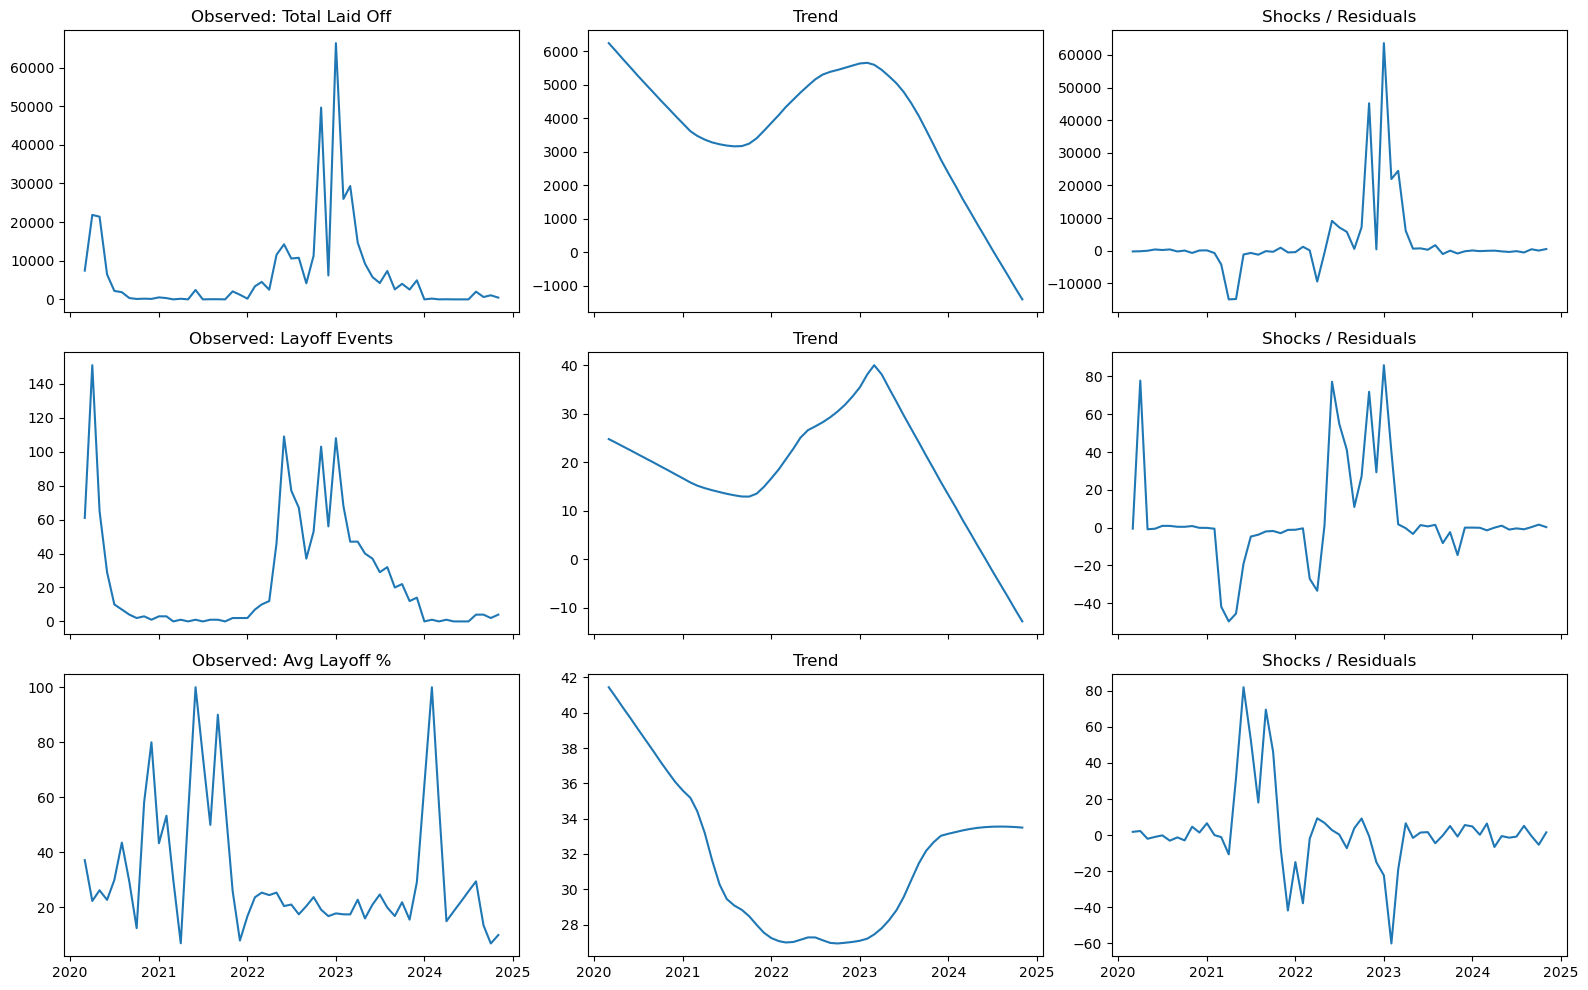

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(16, 10), sharex=True)

# -------- TOTAL LAID OFF --------
axes[0,0].plot(monthly_ts['total_laid_off'])
axes[0,0].set_title("Observed: Total Laid Off")

axes[0,1].plot(stl_laid_off.trend)
axes[0,1].set_title("Trend")

axes[0,2].plot(stl_laid_off.resid)
axes[0,2].set_title("Shocks / Residuals")

# -------- LAYOFF EVENTS --------
axes[1,0].plot(monthly_ts['layoff_events'])
axes[1,0].set_title("Observed: Layoff Events")

axes[1,1].plot(stl_events.trend)
axes[1,1].set_title("Trend")

axes[1,2].plot(stl_events.resid)
axes[1,2].set_title("Shocks / Residuals")

# -------- AVG LAYOFF % --------
axes[2,0].plot(monthly_ts['avg_layoff_percentage'])
axes[2,0].set_title("Observed: Avg Layoff %")

axes[2,1].plot(stl_pct.trend)
axes[2,1].set_title("Trend")

axes[2,2].plot(stl_pct.resid)
axes[2,2].set_title("Shocks / Residuals")

plt.tight_layout()
plt.show()


Each row shows a different layoff metric. The left column is what we observe, the middle shows long-term structural change, and the right highlights abnormal shocks.

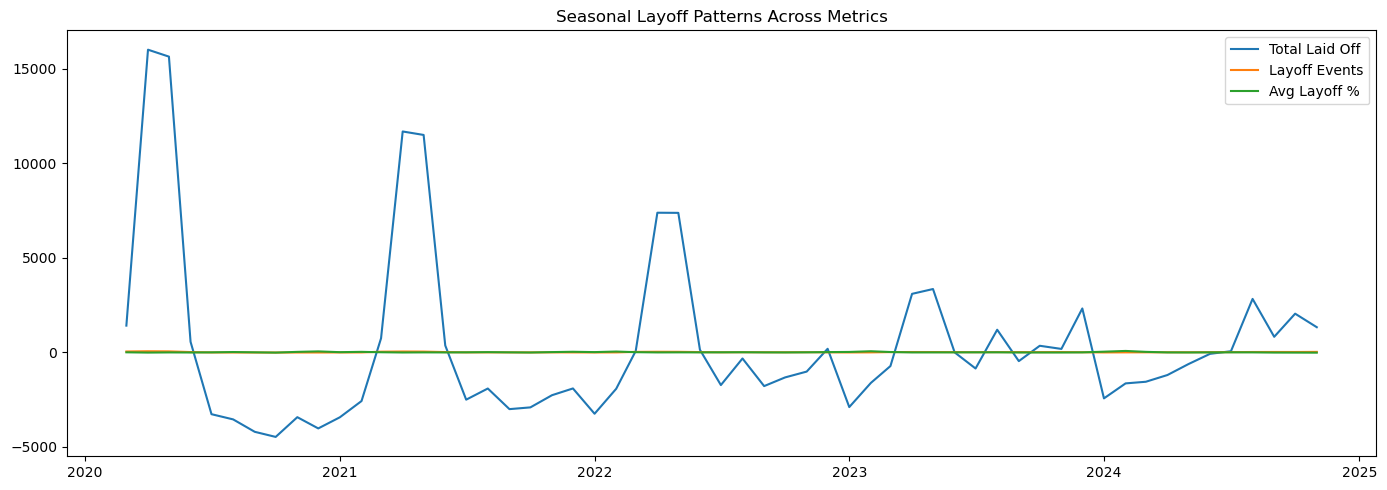

In [22]:
plt.figure(figsize=(14,5))

plt.plot(stl_laid_off.seasonal, label="Total Laid Off")
plt.plot(stl_events.seasonal, label="Layoff Events")
plt.plot(stl_pct.seasonal, label="Avg Layoff %")

plt.title("Seasonal Layoff Patterns Across Metrics")
plt.legend()
plt.tight_layout()
plt.show()


## 4.2 Autoregresssive Modeling; Baseline Layoff Dynamics
Show whether layoffs today are explained by their own past behavior, i.e. persistence, momentum, and decay, before shocks or external drivers.

We’ll use Total Employees Laid Off (monthly) as the baseline signal.

### 4.2.1 Baseline AR model; Does last month explain this month?

In [23]:
from statsmodels.tsa.ar_model import AutoReg
y = monthly_ts['total_laid_off']
ar1 = AutoReg(y, lags=1, old_names=False).fit()
model_ar1 = ar1.fittedvalues

### 4.2.2 Actual vs AR baseline; How much of layoffs are normal persistence vs unexpected change?

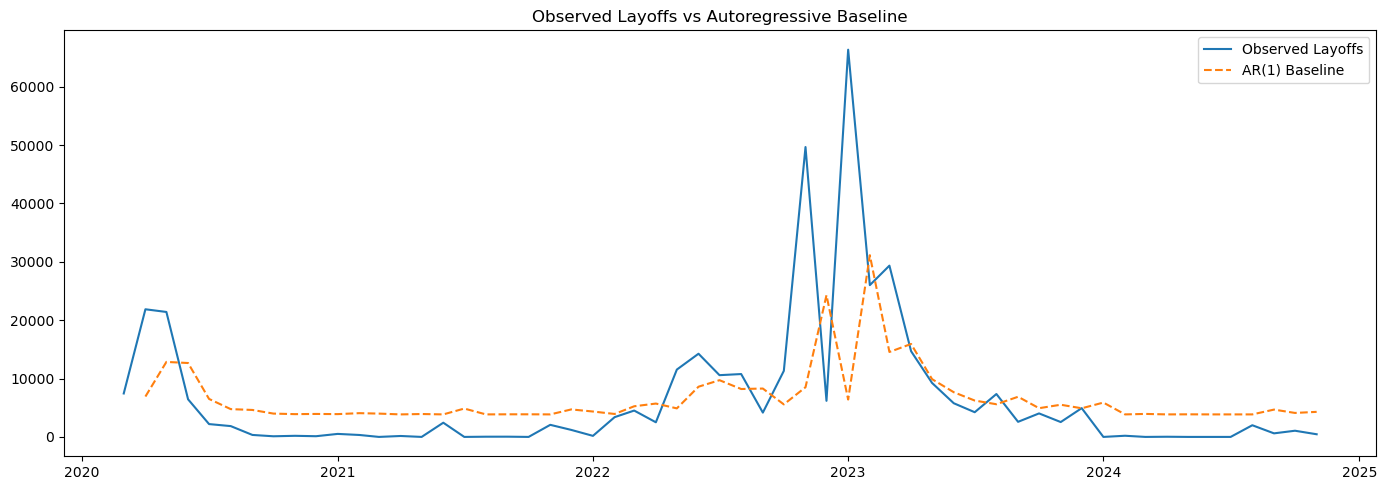

In [25]:
plt.figure(figsize=(14,5))
plt.plot(y, label="Observed Layoffs")
plt.plot(model_ar1, label="AR(1) Baseline", linestyle="--")
plt.title("Observed Layoffs vs Autoregressive Baseline")
plt.legend()
plt.tight_layout()
plt.show()

Layoffs are self-propagating through all years, ecpect in the begining of 2023, where external shocks seem to dominate.


### 4.2.3 Residuals from AR baseline (shock signal)
This isolates what AR cannot explain.

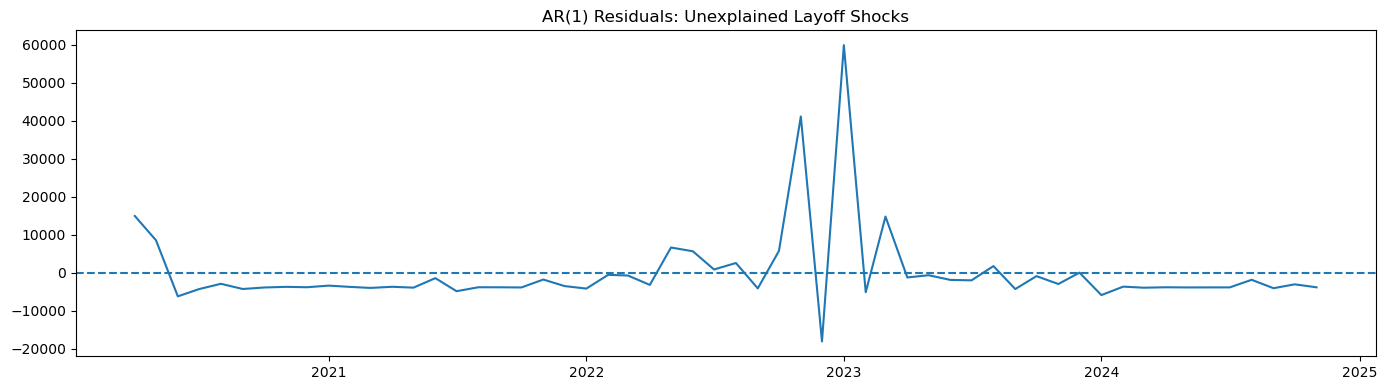

In [26]:
ar_resid = y.loc[model_ar1.index] - model_ar1

plt.figure(figsize=(14,4))
plt.plot(ar_resid)
plt.axhline(0, linestyle="--")
plt.title("AR(1) Residuals: Unexplained Layoff Shocks")
plt.tight_layout()
plt.show()


These spikes represent periods where layoffs were not explained by recent history, indicating structural or crisis-driven events

### 4.2.4 Persistence check(ACF); Do layoffs echo into future months?

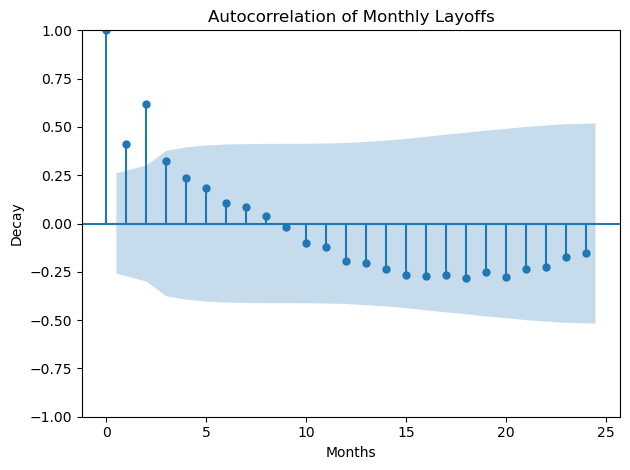

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(y, lags=24)
plt.title("Autocorrelation of Monthly Layoffs")
plt.xlabel('Months')
plt.ylabel('Decay')
plt.tight_layout()
plt.show()


Strong positive autocorrelation at short lags (1–3 months)
- Layoffs tend to persist briefly; high layoff months are often followed by elevated layoffs.

Rapid decay toward zero by ~6–8 months
- The effect of past layoffs dissipates quickly; there is no long-term momentum.

Mild negative autocorrelation at longer lags
- Indicates mean reversion: after periods of heavy layoffs, activity tends to slow or stabilize.

Most lags fall within confidence bounds after early months
- Persistence is limited and short-lived, not structural.

Monthly layoffs exhibit short-term persistence lasting a few months, followed by rapid decay and mean reversion, indicating that workforce reductions are driven more by episodic shocks than by long-term autoregressive dynamics